<a href="https://colab.research.google.com/github/judedontoh/Pothole_Detection_on_Roads/blob/main/Pothole_Detection_on_Roads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project developed a YOLOv8 model to detect potholes on roads using annotated images for training. The model was tested for accuracy and then applied to real-time video footage, effectively identifying potholes. This application aims to improve road safety and maintenance by enabling real-time monitoring for autonomous vehicles and road maintenance systems.

#**Importing the Required Libraries**

In [1]:
import os


In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
from IPython import display

In [5]:
display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [6]:
!nvidia-smi

Thu Jun 20 20:33:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
HOME = os.getcwd()

In [8]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

In [9]:
!pip install ultralytics

##Checking whether YOLOv8 is Installed and its working Fine

In [10]:
import ultralytics

In [11]:
ultralytics.checks()

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/201.2 GB disk)


#**Importing the Potholes Images Dataset from Roboflow**

In [12]:
!mkdir {HOME}/datasets


mkdir: cannot create directory ‘/content/datasets’: File exists


In [13]:
!pwd

/content


In [14]:
%cd {HOME}/datasets


/content/datasets


In [15]:
!pwd

/content/datasets


In [21]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HsHMThKHMJ8hwrOcpAc9")
project = rf.workspace("jude-h0f2m").project("pothole-detection-yolov8-jnw3f")
version = project.version(2)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to POTHOLE-DETECTION-YOLOV8-2 in yolov5pytorch:: 100%|██████████| 2890/2890 [00:00<00:00, 4249.41it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [22]:
%cd {HOME}

/content


In [23]:
%cd {dataset.location}

/content/datasets/POTHOLE-DETECTION-YOLOV8-2/POTHOLE-DETECTION-YOLOV8-2


In [25]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data='//content/datasets/POTHOLE-DETECTION-YOLOV8-2/POTHOLE-DETECTION-YOLOV8-2/data.yaml' epochs=50 imgsz=640

/content
Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=//content/datasets/POTHOLE-DETECTION-YOLOV8-2/POTHOLE-DETECTION-YOLOV8-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

In [26]:
!ls {HOME}//runs/detect/train3

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1718915964.dbefc857a9b6.4805.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch3160.jpg  weights
P_curve.png					    train_batch3161.jpg
PR_curve.png					    train_batch3162.jpg


#**Displaying the Confusion Matrix**

/content


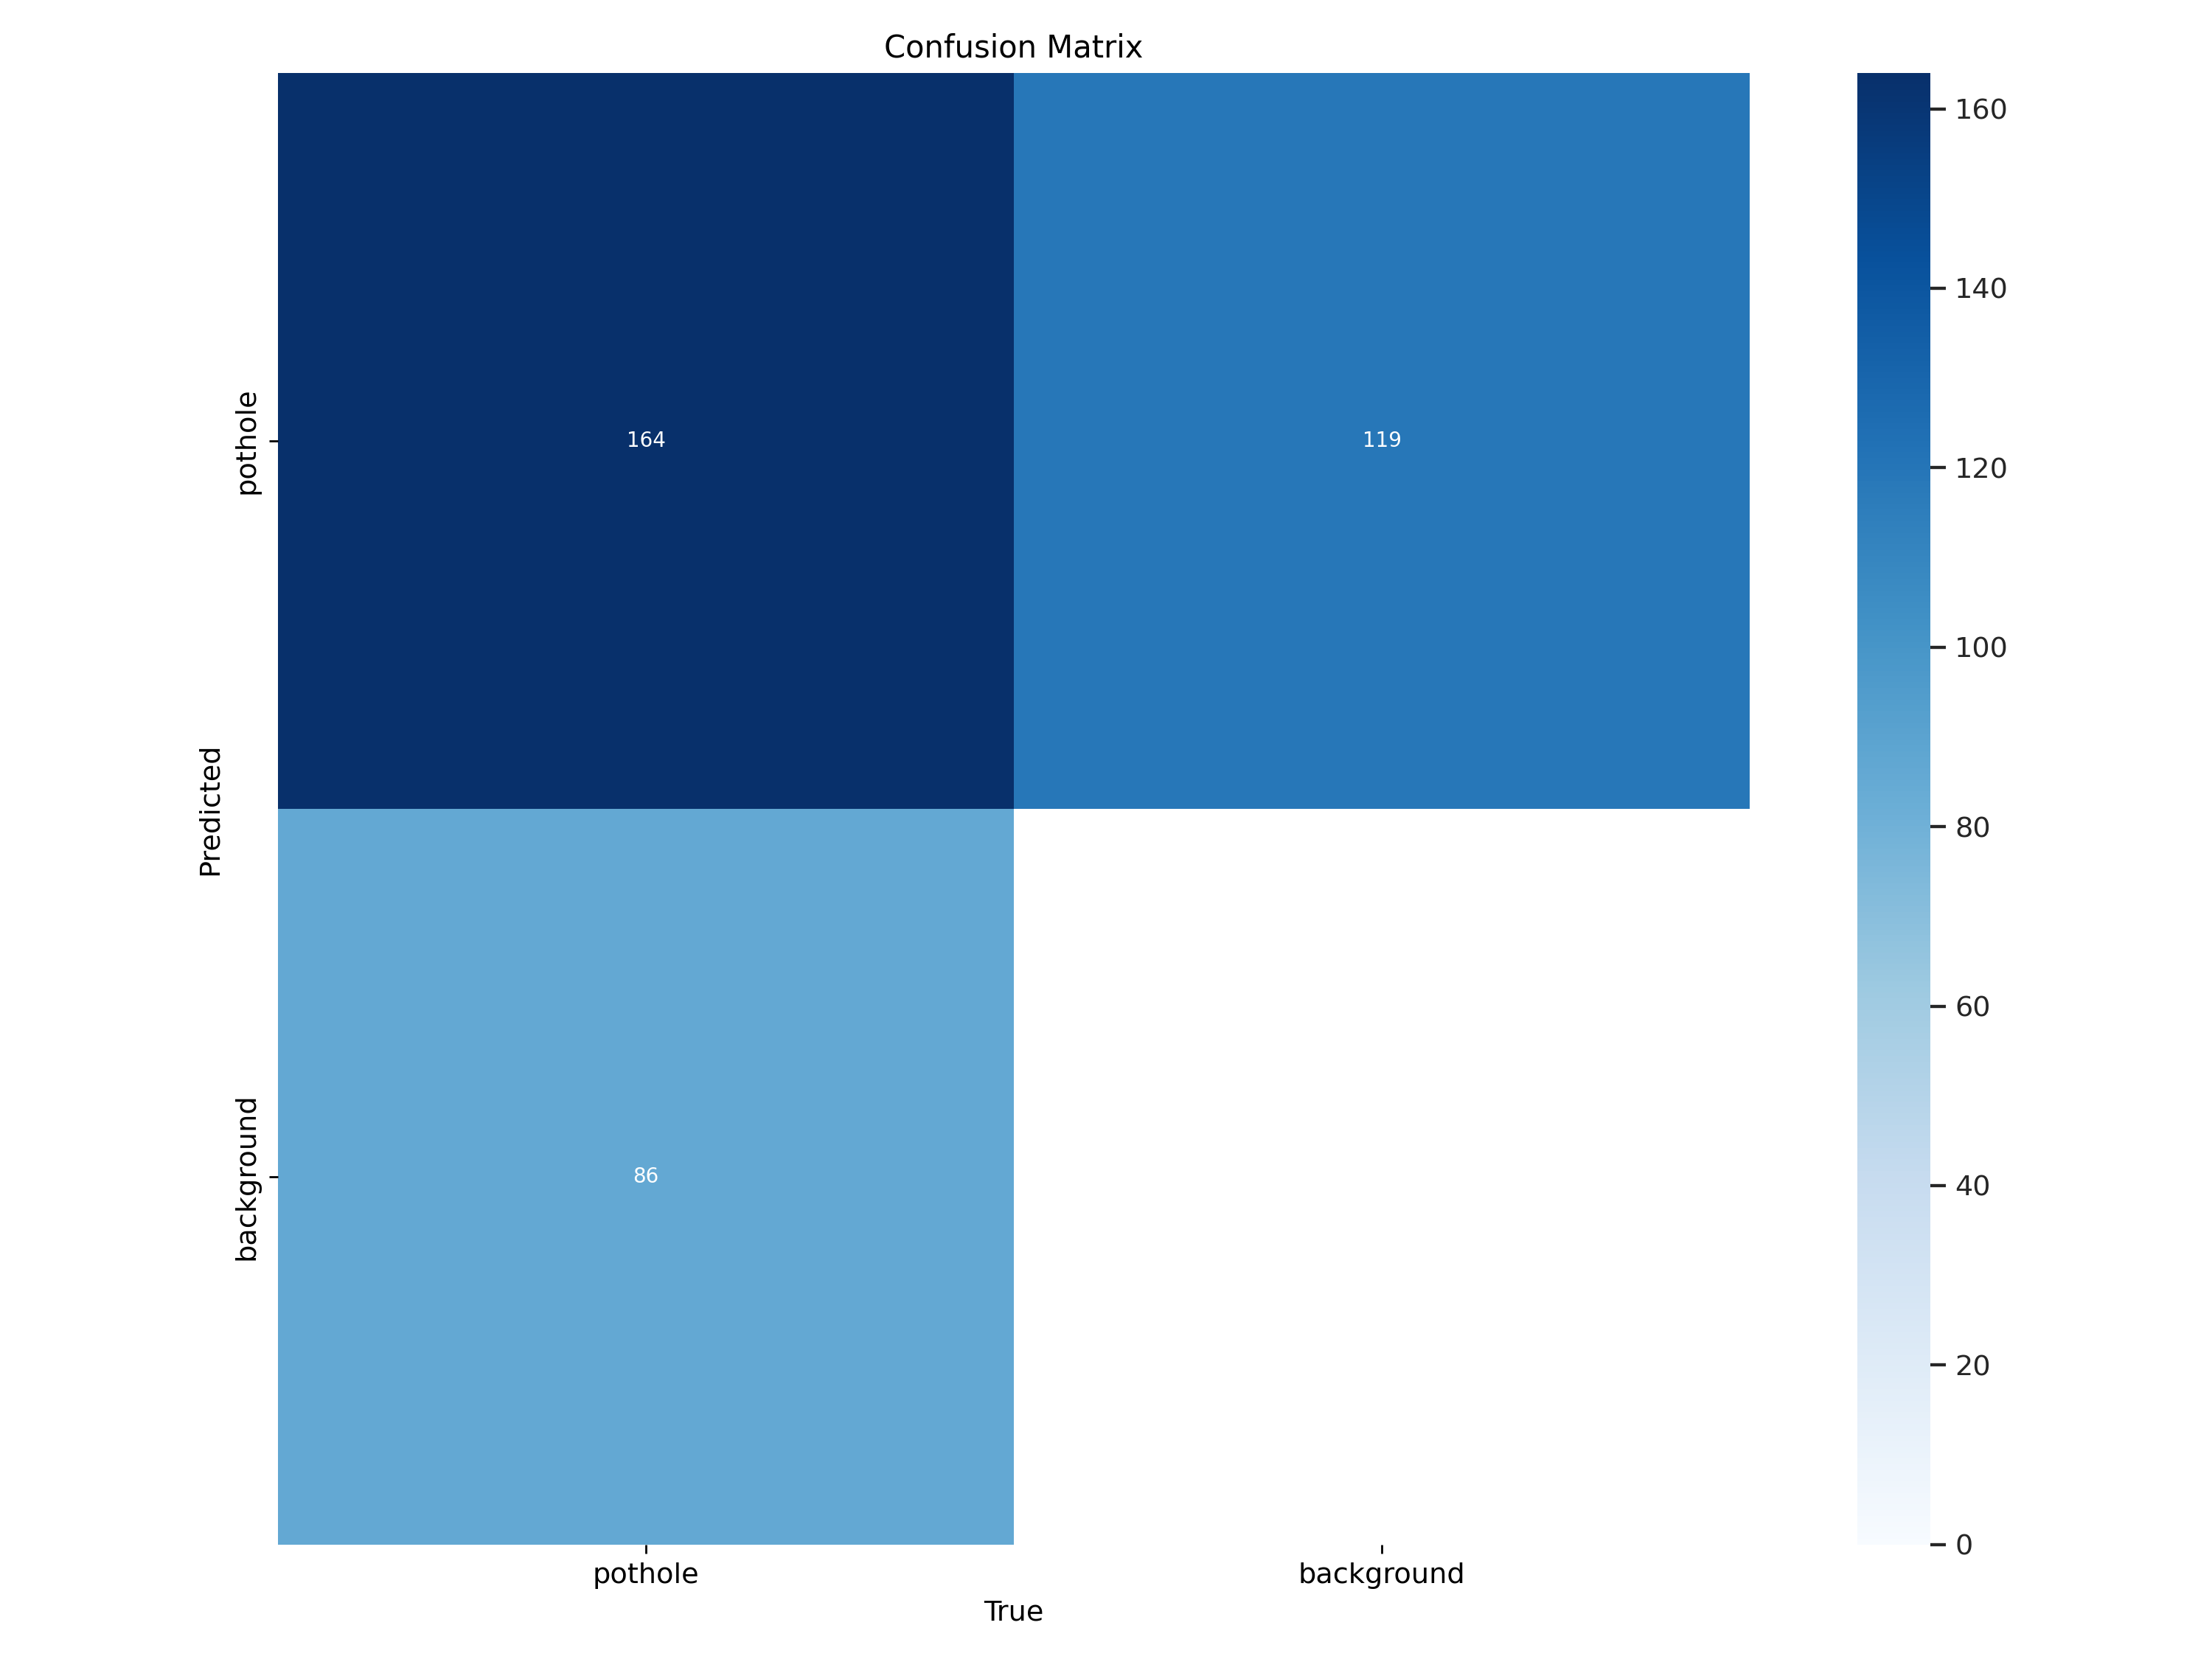

In [27]:
#Confusion matrix is the chart that shows how our model handles different classes
#68% of the time the model detected correctly that there is a pothole, while 32% of the time, when the pothole is there but the model is not
#able to detect it
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=800)

#**Training and Validation Loss**

/content


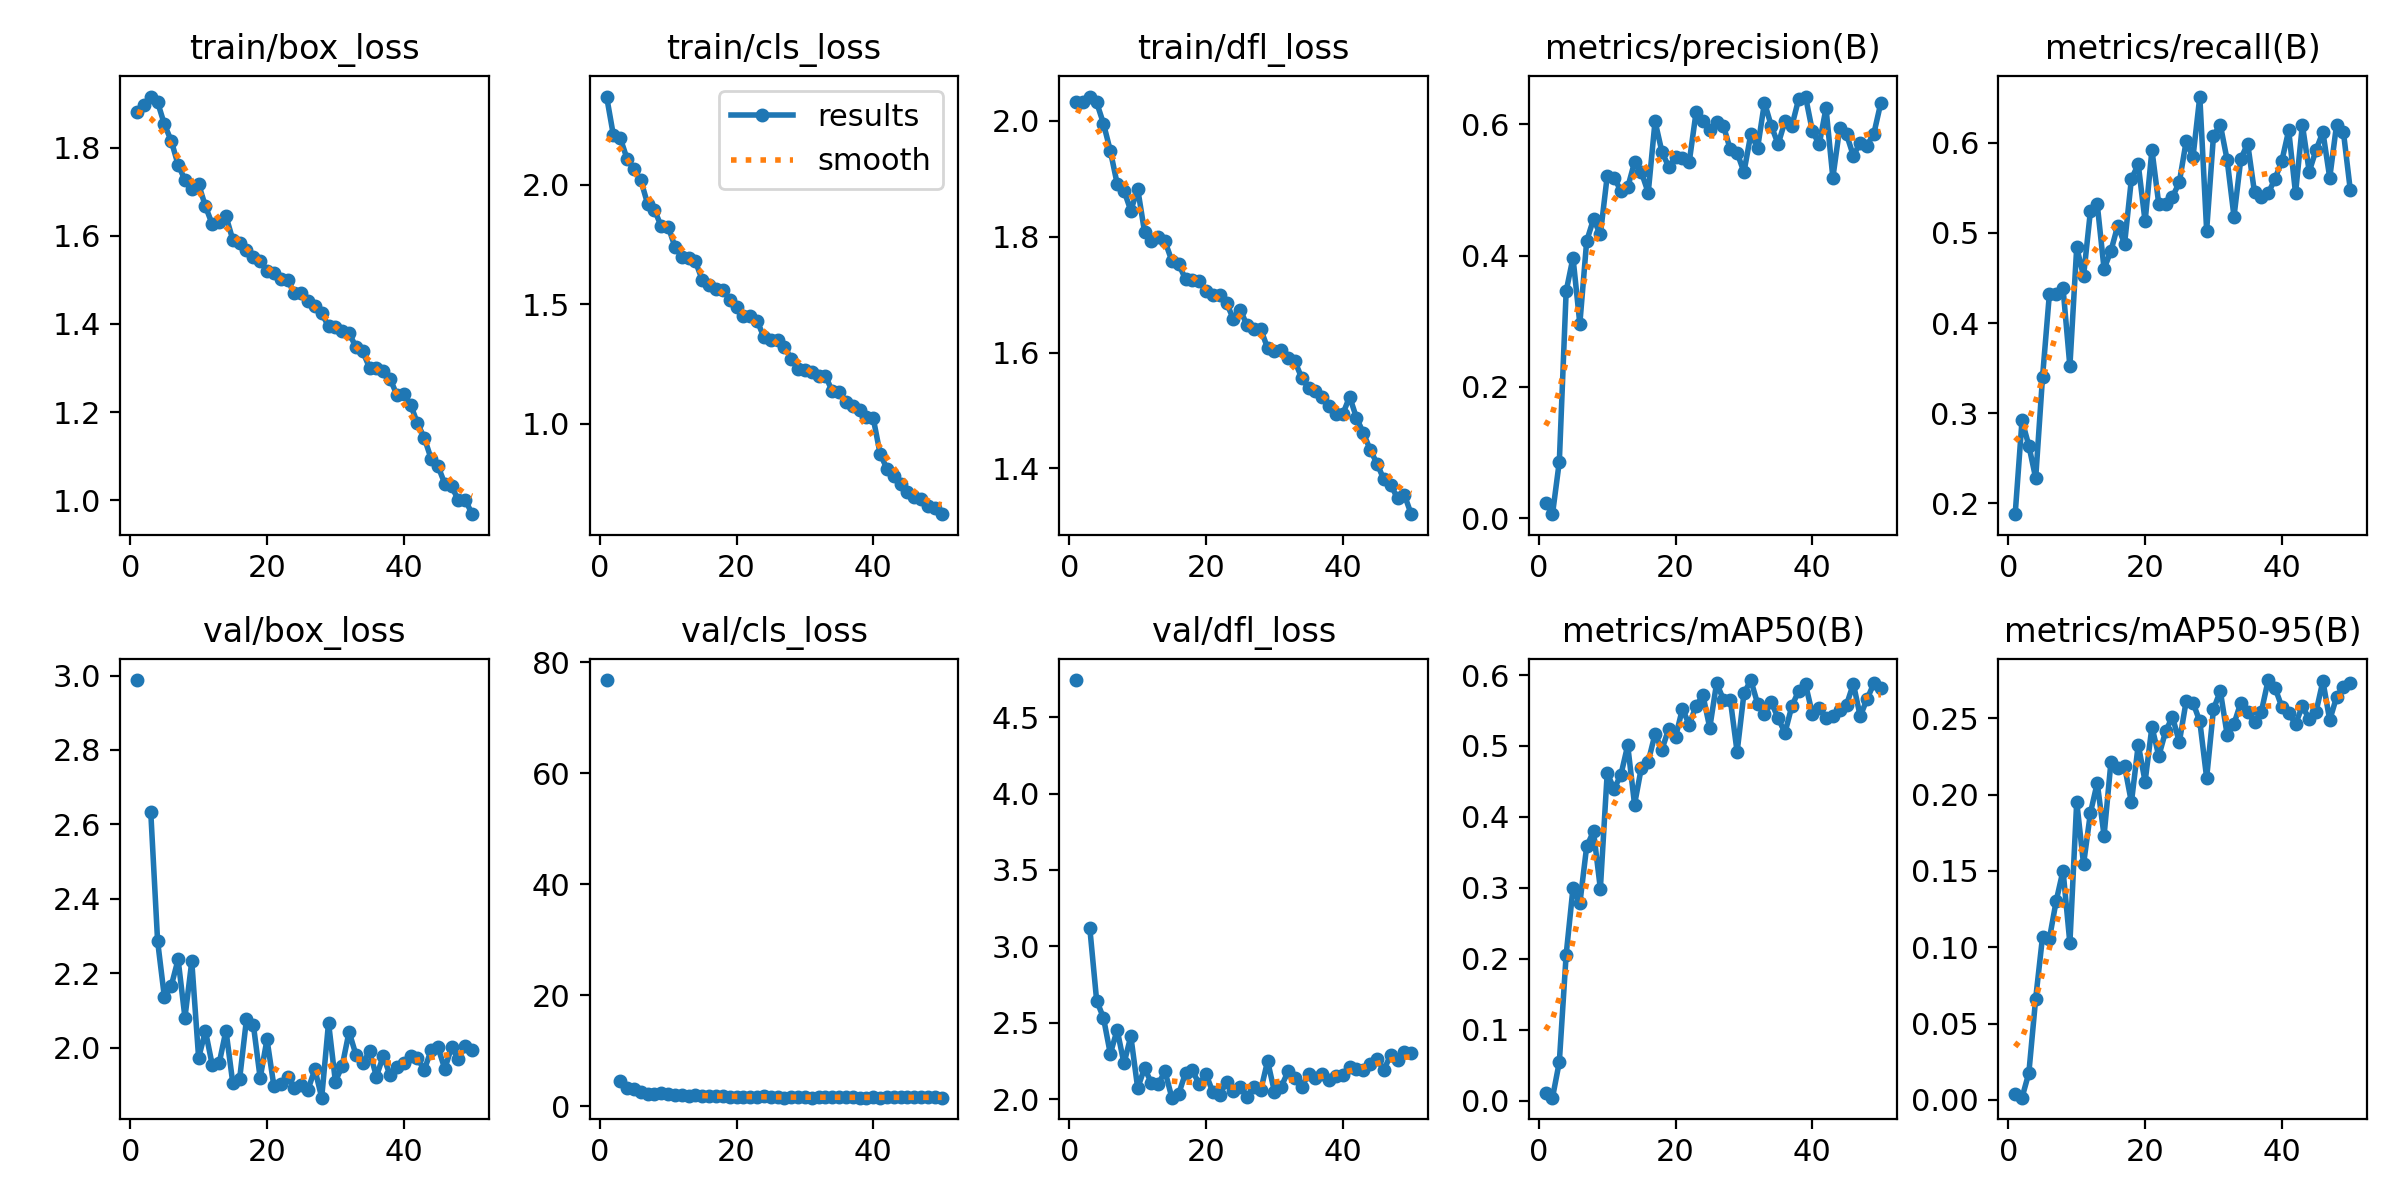

In [28]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/results.png', width=700)

/content


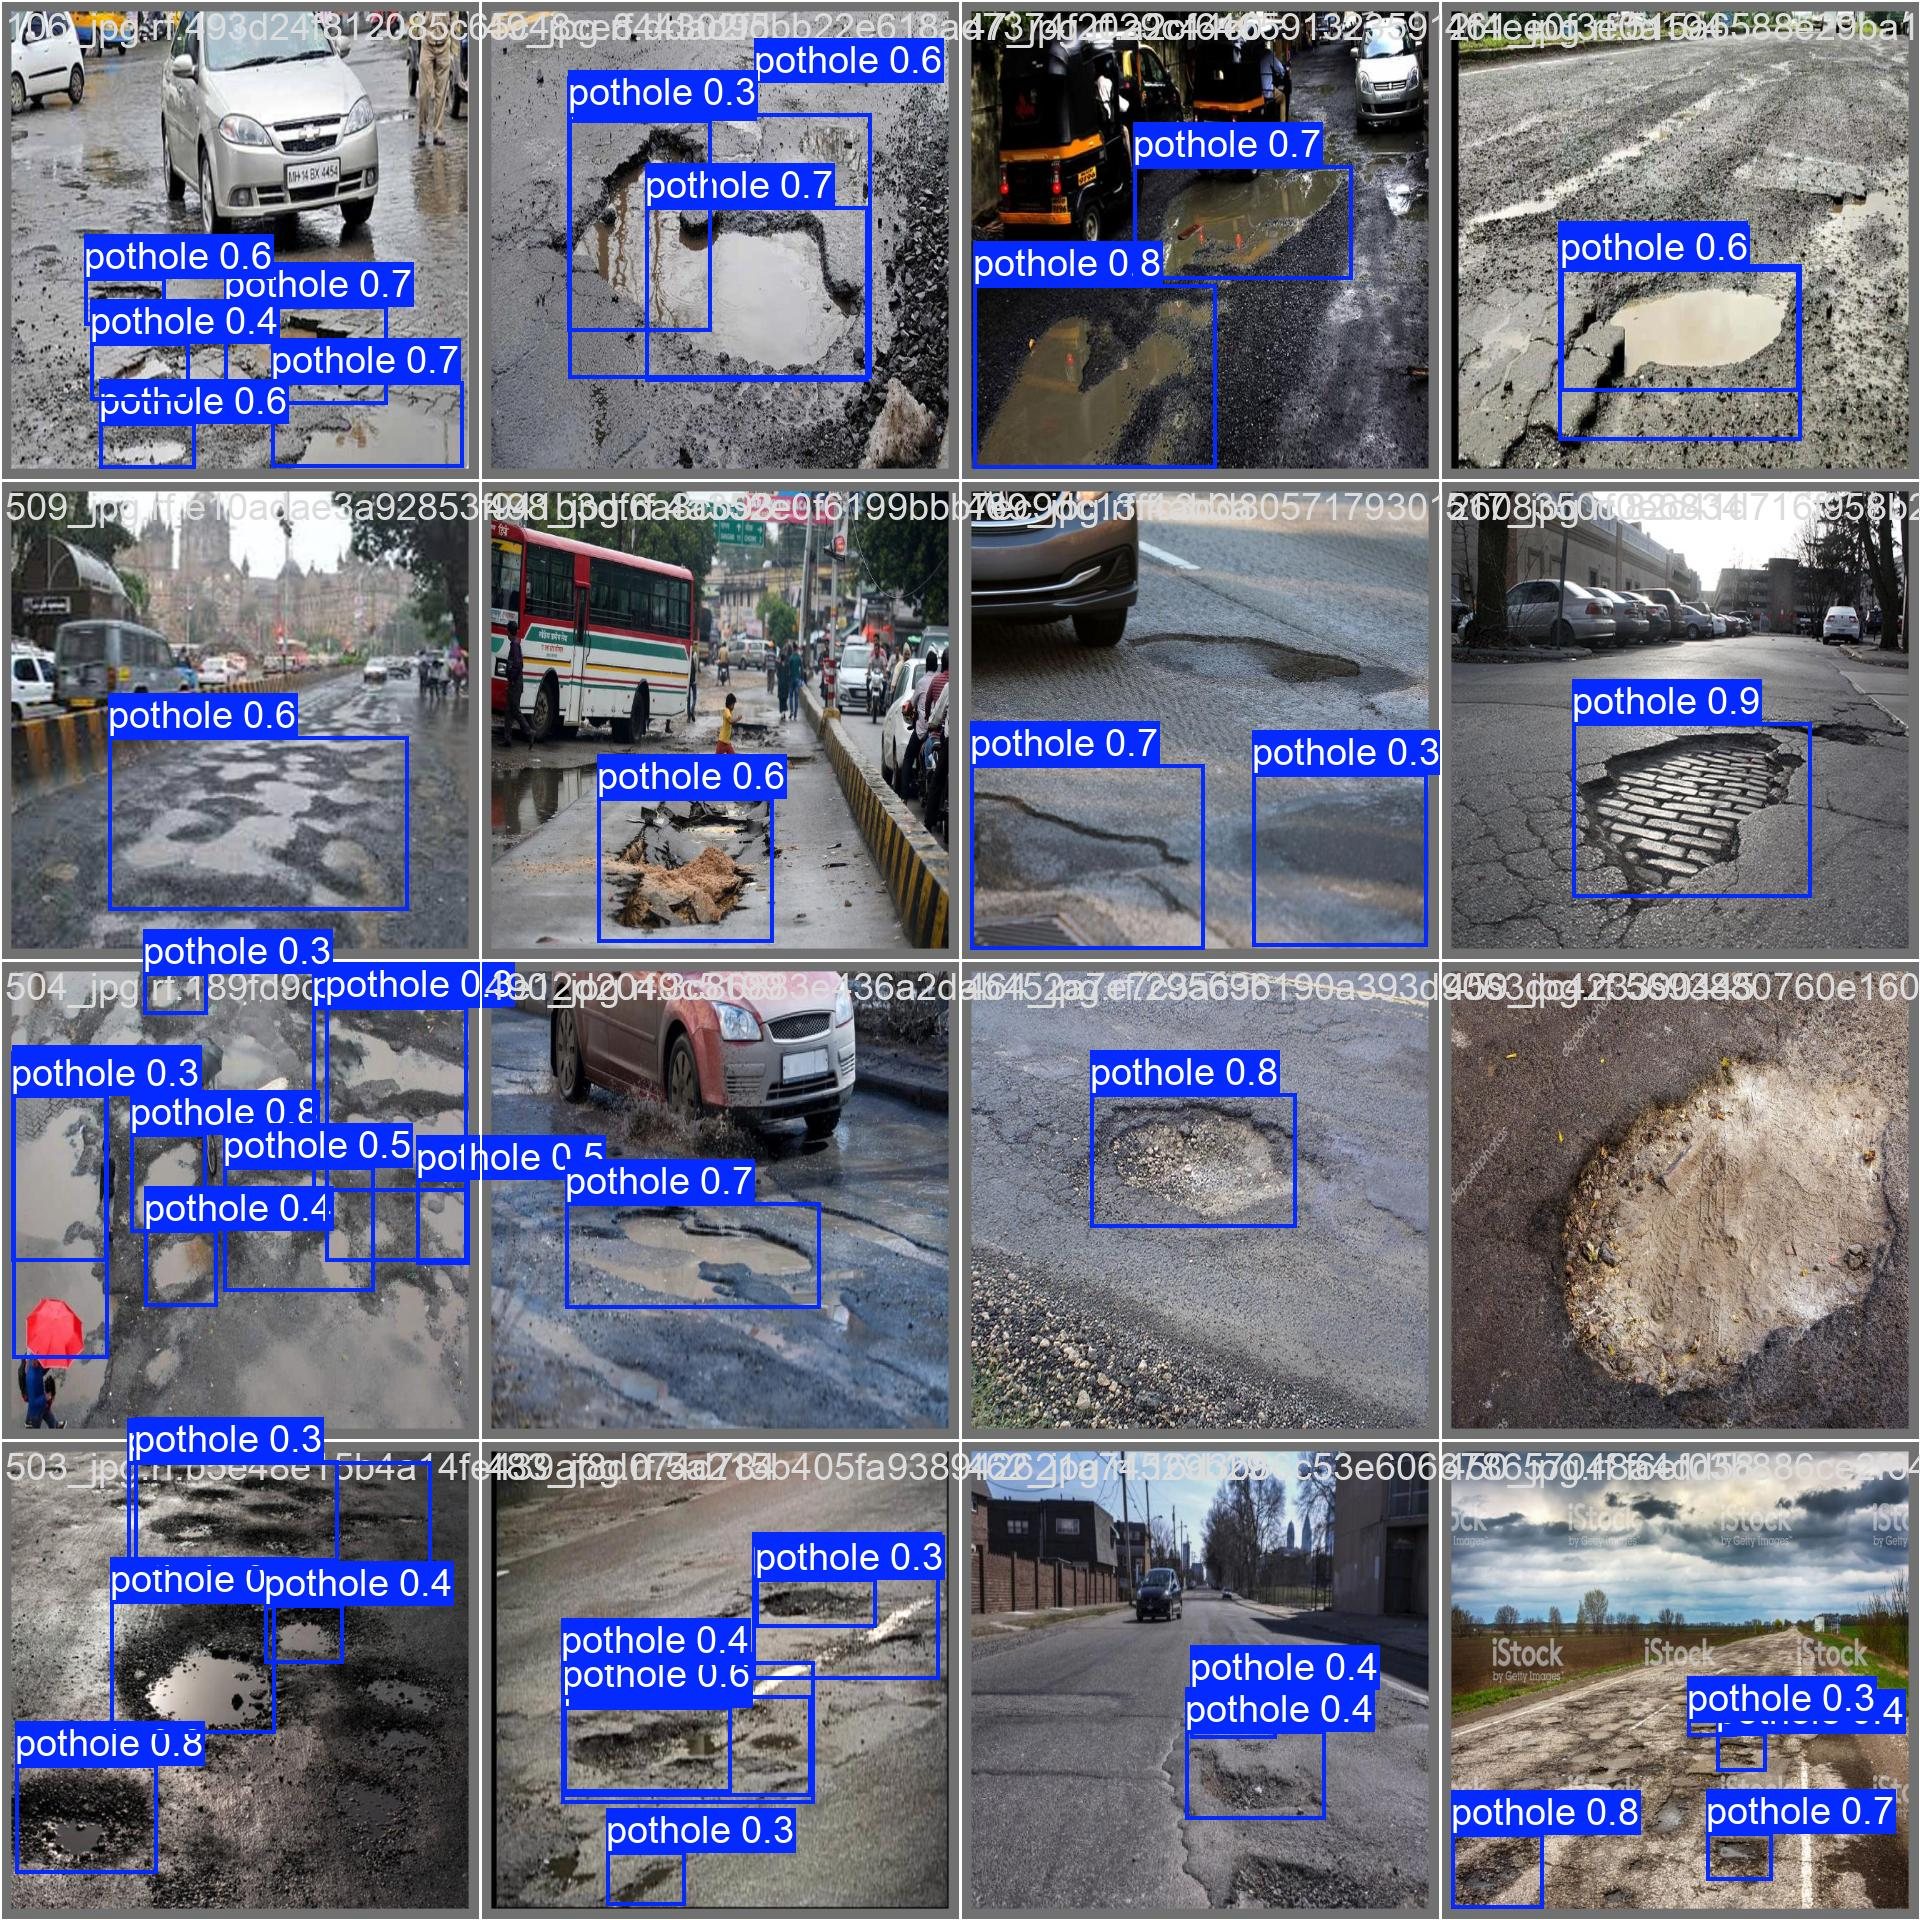

In [29]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [30]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using
#CLI to do that, The only difference is our mode = val instead of train
#Validation Script is using test dataset that was not used beforew

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data=/content/datasets/POTHOLE-DETECTION-YOLOV8-2/POTHOLE-DETECTION-YOLOV8-2/data.yaml

/content
Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/POTHOLE-DETECTION-YOLOV8-2/POTHOLE-DETECTION-YOLOV8-2/valid/labels.cache... 121 images, 0 backgrounds, 0 corrupt: 100% 121/121 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:07<00:00,  1.09it/s]
                   all        121        250      0.538       0.62      0.588      0.274
Speed: 6.8ms preprocess, 22.5ms inference, 0.3ms loss, 10.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


#**Inference with Custom Model**

In [31]:
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source=/content/datasets/POTHOLE-DETECTION-YOLOV8-2/POTHOLE-DETECTION-YOLOV8-2/test/images

/content
Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/60 /content/datasets/POTHOLE-DETECTION-YOLOV8-2/POTHOLE-DETECTION-YOLOV8-2/test/images/112_jpg.rf.08d9aa3be40796c1d1384b0c6f71a1ca.jpg: 640x640 (no detections), 37.3ms
image 2/60 /content/datasets/POTHOLE-DETECTION-YOLOV8-2/POTHOLE-DETECTION-YOLOV8-2/test/images/121_jpg.rf.9b7624743ce5050d15712afabad870cb.jpg: 640x640 2 potholes, 37.1ms
image 3/60 /content/datasets/POTHOLE-DETECTION-YOLOV8-2/POTHOLE-DETECTION-YOLOV8-2/test/images/122_jpg.rf.cb203b03acd9946e16896e280c4e82e8.jpg: 640x640 2 potholes, 34.1ms
image 4/60 /content/datasets/POTHOLE-DETECTION-YOLOV8-2/POTHOLE-DETECTION-YOLOV8-2/test/images/130_jpg.rf.674d2384d2728ad40d53b3bcc96068fc.jpg: 640x640 (no detections), 34.0ms
image 5/60 /content/datasets/POTHOLE-DETECTION-YOLOV8-2/POTHOLE-DETECTION-YOLOV8-2/test/images/134_jpg.rf.b6ce86e6bf38d72f1d1a96

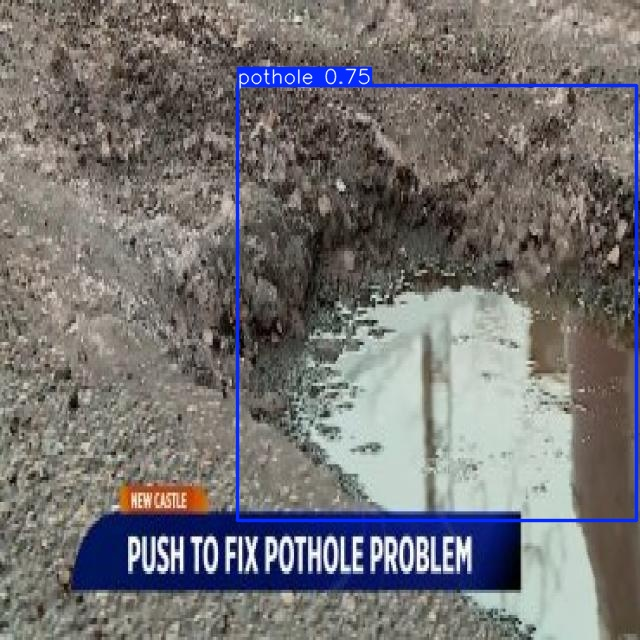

In [33]:
Image("/content/runs/detect/predict/353_jpg.rf.ac18387e61114f86089b10415f7eb0e6.jpg")

#**Testing on a Demo Video**

In [34]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 204MB/s]


In [35]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/324) /content/demo.mp4: 384x640 2 potholes, 107.5ms
video 1/1 (frame 2/324) /content/demo.mp4: 384x640 2 potholes, 25.1ms
video 1/1 (frame 3/324) /content/demo.mp4: 384x640 2 potholes, 25.1ms
video 1/1 (frame 4/324) /content/demo.mp4: 384x640 4 potholes, 25.1ms
video 1/1 (frame 5/324) /content/demo.mp4: 384x640 2 potholes, 25.1ms
video 1/1 (frame 6/324) /content/demo.mp4: 384x640 1 pothole, 25.1ms
video 1/1 (frame 7/324) /content/demo.mp4: 384x640 1 pothole, 20.6ms
video 1/1 (frame 8/324) /content/demo.mp4: 384x640 2 potholes, 20.6ms
video 1/1 (frame 9/324) /content/demo.mp4: 384x640 1 pothole, 20.6ms
video 1/1 (frame 10/324) /content/demo.mp4: 384x640 3 potholes, 20.6ms
video 1/1 (frame 11/324) /content/demo.mp4: 384x640 2 potholes, 19.9ms
video 1/1 (frame 12/324) /content/demo.mp4: 384x640 

#**Display the Demo Video**

In [44]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [45]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/demo.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)